# Ocena števila vrtljajev ventilatorja

V tej nalogi analiziramo vibracijske signale ventilatorjev z namenom ocene njihovih vrtljajev na minuto (RPM). 

Uporabljena je bila metoda kompleksnega skalarnega produkta za izračun frekvenčnega spektra, iz katerega smo določili dominantno frekvenco. 

Na podlagi znanega števila lopatic smo izračunali približen RPM, rezultate pa ponazorili s spektralnimi grafikoni. Za primerjavo smo testno uporabili tudi FFT.


In [9]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

folder_path = 'rpm'
audio_signals = {}

for file_name in os.listdir(folder_path):
    if file_name.lower().endswith('.m4a'):
        file_path = os.path.join(folder_path, file_name)
        signal, sr = librosa.load(file_path, sr=None)
        key = os.path.splitext(file_name)[0]
        audio_signals[key] = (signal, sr)

print("Loaded files:", list(audio_signals.keys()))
print("Sample length of first signal:", len(next(iter(audio_signals.values()))[0]))

blade_counts = {
    'sig_a_1': 10,
    'sig_b_1': 5,
    'sig_c_1': 3,
    'sig_c_2': 3,
    'sig_c_3': 3,
    'sig_c_4': 3,
    'sig_c_5': 3,
    'sig_c_6': 3,
    'sig_c_7': 3,
}


Loaded files: ['sig_c_3', 'sig_a_1', 'sig_c_2', 'sig_c_1', 'sig_c_5', 'sig_c_4', 'sig_c_6', 'sig_c_7', 'sig_b_1']
Sample length of first signal: 986048


In [26]:
def analyze_fan_signal(key, signal, sr, num_blades, duration=None, max_freq=1000):
    print(f"Analyzing: {key} ({num_blades} blades)")

    if duration:
        signal = signal[:int(duration * sr)]

    freqs = np.arange(1, max_freq + 1, 1)

    magnitudes = complex_scalar_product(signal, sr, freqs)

    plot_spectrum(freqs, magnitudes, f"{key.upper()} - DFT Spectrum")

    peak_idx = np.argmax(magnitudes)
    peak_freq = freqs[peak_idx]
    rpm_estimate = (peak_freq * 60) / num_blades

    print(f"Peak frequency: {peak_freq:.2f} Hz → RPM ≈ {rpm_estimate:.0f}")

    harmonics = [(i * peak_freq, magnitudes[peak_idx * i]) for i in range(2, 6) if peak_idx * i < len(magnitudes)]
    for freq, mag in harmonics:
        print(f"  Harmonic at {freq:.1f} Hz, magnitude = {mag:.2f}")

    return peak_freq, rpm_estimate

def complex_scalar_product(signal, sample_rate, freqs):
    n = np.arange(len(signal))
    result = []

    for f in freqs:
        sin = np.sin(2 * np.pi * f * n / sample_rate)
        cos = np.cos(2 * np.pi * f * n / sample_rate)
        real_proj = np.dot(signal, cos)
        imag_proj = np.dot(signal, sin)
        magnitude = np.sqrt(real_proj**2 + imag_proj**2)
        result.append(magnitude)
    
    return np.array(result)

def plot_spectrum(freqs, magnitudes, title):
    plt.figure(figsize=(10, 4))
    plt.plot(freqs, magnitudes)
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (Scalar Product)')
    plt.grid(True)
    plt.xlim(0, max(freqs))
    plt.tight_layout()
    plt.show()
    

Analyzing: sig_a_1 (10 blades)


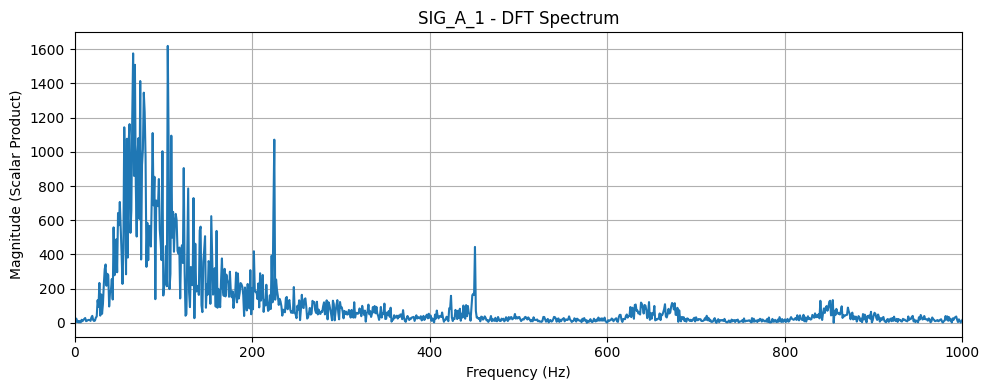

Peak frequency: 105.00 Hz → RPM ≈ 630
  Harmonic at 210.0 Hz, magnitude = 290.18
  Harmonic at 315.0 Hz, magnitude = 43.06
  Harmonic at 420.0 Hz, magnitude = 18.72
  Harmonic at 525.0 Hz, magnitude = 20.54
Analyzing: sig_b_1 (5 blades)


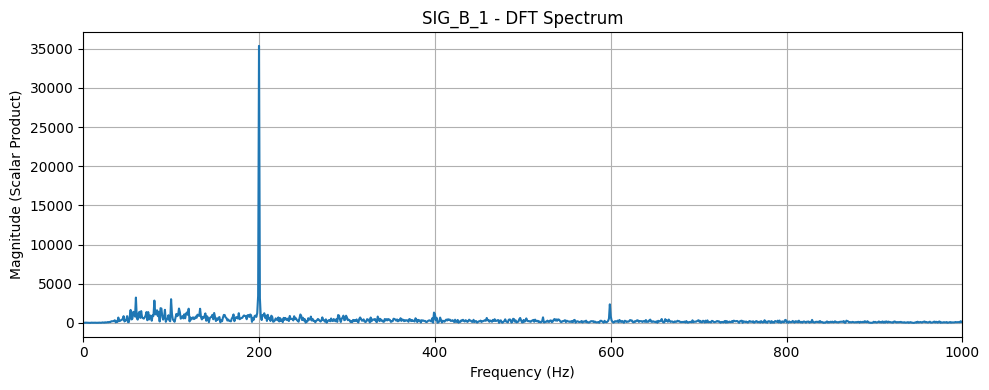

Peak frequency: 200.00 Hz → RPM ≈ 2400
  Harmonic at 400.0 Hz, magnitude = 1321.13
  Harmonic at 600.0 Hz, magnitude = 555.34
  Harmonic at 800.0 Hz, magnitude = 82.17
  Harmonic at 1000.0 Hz, magnitude = 104.89
Analyzing: sig_c_1 (3 blades)


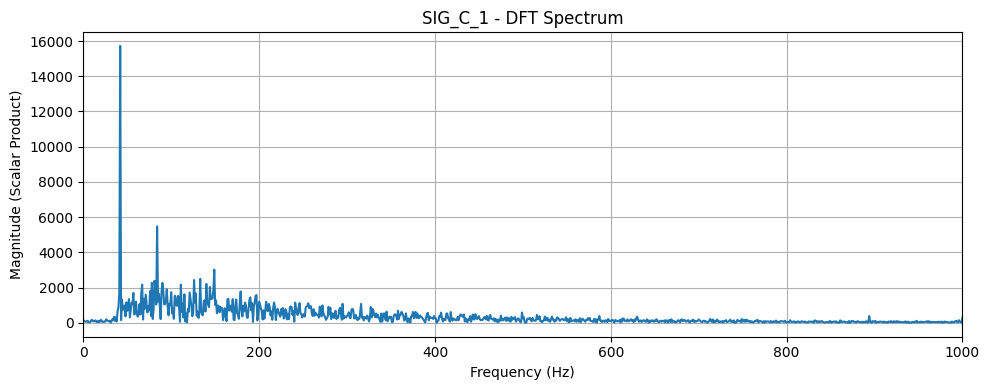

Peak frequency: 42.00 Hz → RPM ≈ 840
  Harmonic at 84.0 Hz, magnitude = 1045.31
  Harmonic at 126.0 Hz, magnitude = 383.70
  Harmonic at 168.0 Hz, magnitude = 1363.00
  Harmonic at 210.0 Hz, magnitude = 240.20
Analyzing: sig_c_2 (3 blades)


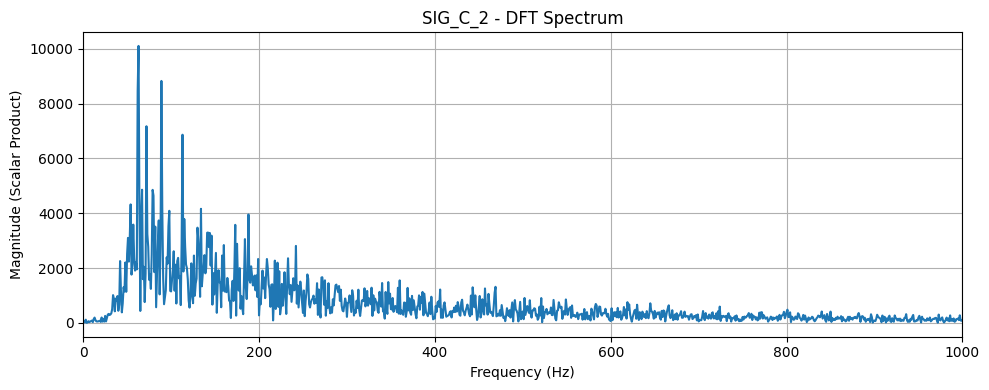

Peak frequency: 63.00 Hz → RPM ≈ 1260
  Harmonic at 126.0 Hz, magnitude = 719.22
  Harmonic at 189.0 Hz, magnitude = 1688.38
  Harmonic at 252.0 Hz, magnitude = 729.37
  Harmonic at 315.0 Hz, magnitude = 809.47
Analyzing: sig_c_3 (3 blades)


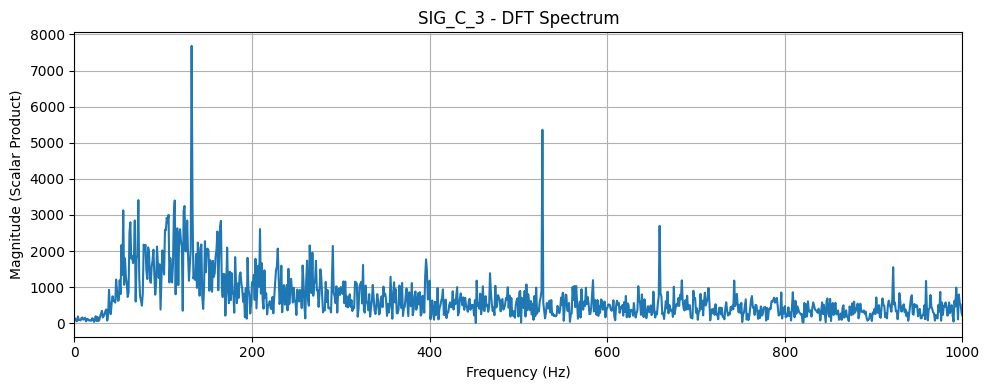

Peak frequency: 132.00 Hz → RPM ≈ 2640
  Harmonic at 264.0 Hz, magnitude = 691.41
  Harmonic at 396.0 Hz, magnitude = 293.51
  Harmonic at 528.0 Hz, magnitude = 713.92
  Harmonic at 660.0 Hz, magnitude = 243.68
Analyzing: sig_c_4 (3 blades)


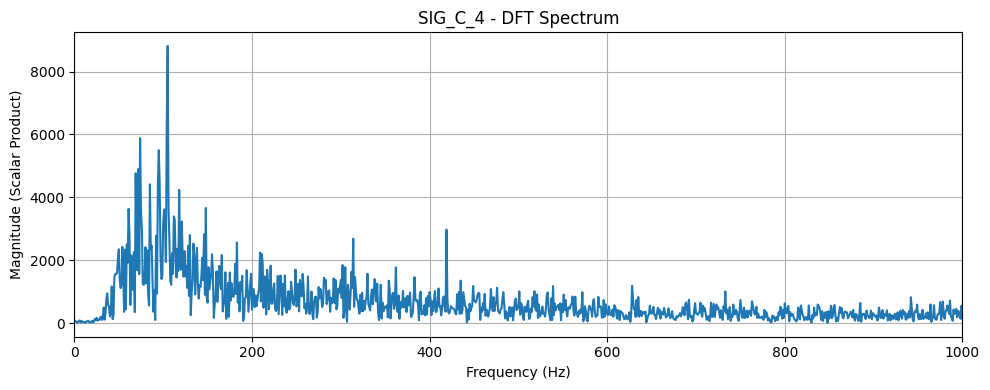

Peak frequency: 105.00 Hz → RPM ≈ 2100
  Harmonic at 210.0 Hz, magnitude = 2243.27
  Harmonic at 315.0 Hz, magnitude = 1120.34
  Harmonic at 420.0 Hz, magnitude = 517.90
  Harmonic at 525.0 Hz, magnitude = 911.51
Analyzing: sig_c_5 (3 blades)


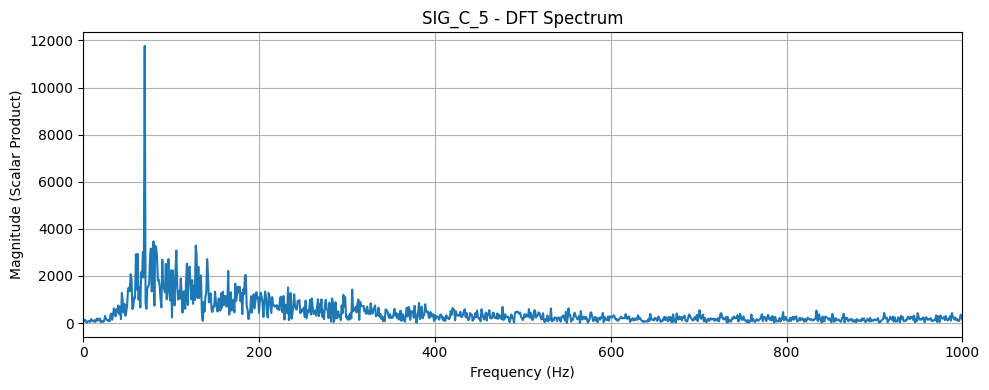

Peak frequency: 70.00 Hz → RPM ≈ 1400
  Harmonic at 140.0 Hz, magnitude = 1114.28
  Harmonic at 210.0 Hz, magnitude = 1062.84
  Harmonic at 280.0 Hz, magnitude = 594.40
  Harmonic at 350.0 Hz, magnitude = 497.63
Analyzing: sig_c_6 (3 blades)


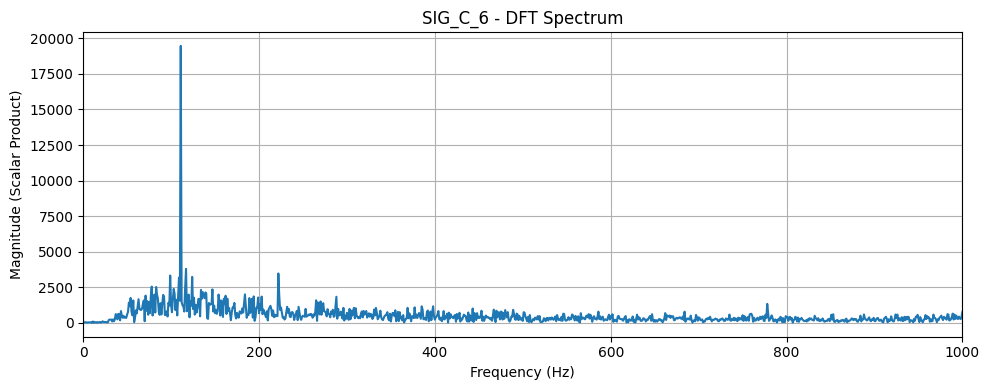

Peak frequency: 111.00 Hz → RPM ≈ 2220
  Harmonic at 222.0 Hz, magnitude = 479.63
  Harmonic at 333.0 Hz, magnitude = 939.65
  Harmonic at 444.0 Hz, magnitude = 238.23
  Harmonic at 555.0 Hz, magnitude = 251.90
Analyzing: sig_c_7 (3 blades)


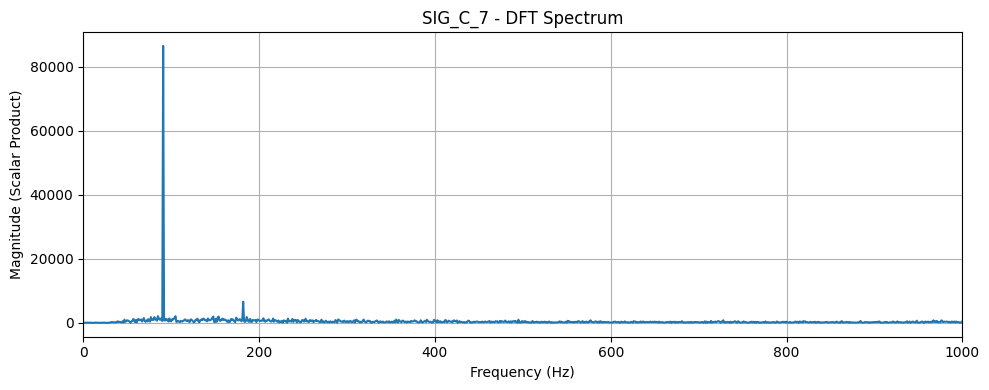

Peak frequency: 91.00 Hz → RPM ≈ 1820
  Harmonic at 182.0 Hz, magnitude = 965.88
  Harmonic at 273.0 Hz, magnitude = 1013.97
  Harmonic at 364.0 Hz, magnitude = 369.90
  Harmonic at 455.0 Hz, magnitude = 212.49


In [27]:
for key, (signal, sr) in sorted(audio_signals.items()):
    num_blades = blade_counts.get(key, 1)
    analyze_fan_signal(key, signal, sr, num_blades)
